__Alejandro Gonzalez Garcia__
<br>
Date: Mar. 4, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 20: Pendulum with RK methods</font></center>

## <font color=#46769B>Introduction</font>

While Euler's method is easy to implement for solving IVPs, but we saw that it had major shortcomings in terms of accuracy, requiring a large number of steps to achieve even a modest accuracy. Higher-order methods can overcome this difficulty, dramatically decreasing the number of steps needed.

The goals of this exercise are:
- Gain experience with second-order (and higher) methods for solving ODEs

Required reading:
- *Lesson 10: Second-order methods*


## <font color=#46769B>Exercise</font>

In Exercise 18, we considered a pendulum with equation of motion

$$\theta''(t) + \omega^2 \sin\theta(t) = 0 \, ,$$

which was solved numerically using Euler's method.  We will assume $\omega = 2\pi$ and an initial condition

$$\theta(0) = \theta_0 , \qquad \theta'(0) = 0 \, .$$ 

The goal here to repeat this exercise using higher-order explicit methods (RK2 and RK4).

## <font color=#46769B>Part (a)</font>

Write three codes:
- `midpoint_method(num_steps,theta_0)` that will perform the midpoint method for a given initial condition $\theta_0$ and $N$ number of steps given by `num_steps`.
- `Heun_method(num_steps,theta_0)` that will do the same for Heun's method.
- `RK4(num_steps,theta_0)` that will do the same for the (classic) RK4 method.

For each, take a fixed interval $[0,5]$ for $t$. Make a plot of $\theta(t)$ vs $t$ for $N=1000$ steps, with an initial condition $\theta_0 = 1$.

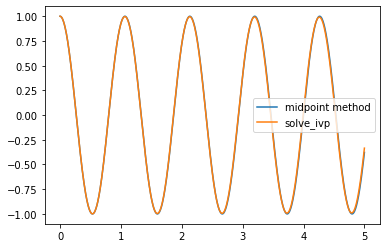

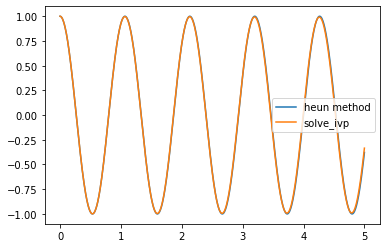

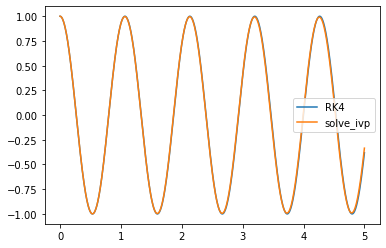

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

omega = 2*np.pi
t0, tf = 0, 5
theta0 = 1 
N = 1000

def f(t,y):
  y1, y2 = y
  return np.array([y2, -omega**2*np.sin(y1)])

#midpoint method

def midpoint_method(num_steps,theta_0):

  t = np.linspace(t0, tf, num=num_steps+1)
  h = t[1]-t[0]


  y = np.zeros((num_steps+1,2))
  y0 = np.array([theta_0,0])
  y[0] = y0

  for i in range(num_steps):
    ti = t[i]
    yi = y[i]
    k1 = f(ti, yi)
    k2 = f(ti + h/2, yi + (h/2)*k1)
    k = k2 
    y[i+1] = yi + h * k
  return t, y 

t, y = midpoint_method(N,theta0)
plt.plot(t,y[:,0],label='midpoint method')
plt.legend()

y0 = [theta0,0]
sol = solve_ivp(f, [t0,tf], y0, t_eval=t)
y = sol.y[0]
plt.plot(t,y,label='solve_ivp')
plt.legend()
plt.show()

# Heun method

def heun_method(num_steps,theta_0):
  t = np.linspace(t0, tf, num=num_steps+1)
  h = t[1]-t[0]


  y = np.zeros((num_steps+1,2))
  y0 = np.array([theta_0,0])
  y[0] = y0

  for i in range(num_steps):
    ti = t[i]
    yi = y[i]
    k1 = f(ti,yi)
    k2 = f(ti + h, yi + h*k1)
    k = (k1 + k2) / 2 
    y[i+1] = yi + h*k
  return t, y 

t, y = heun_method(N,theta0)
plt.plot(t,y[:,0],label='heun method')
plt.legend()

y0 = [theta0,0]
sol = solve_ivp(f, [t0,tf], y0, t_eval=t)
y = sol.y[0]
plt.plot(t,y,label='solve_ivp')
plt.legend()
plt.show()

# RK4

def rk4(num_steps,theta_0):
  t = np.linspace(t0, tf, num=num_steps+1)
  h = t[1]-t[0]


  y = np.zeros((num_steps+1,2))
  y0 = np.array([theta_0,0])
  y[0] = y0

  for i in range(num_steps):
    ti = t[i]
    yi = y[i]
    k1 = f(ti,yi)
    k2 = f(ti + h/2, yi + (h/2)*k1)
    k3 = f(ti + h/2, yi + (h/2)*k2)
    k4 = f(ti + h, yi + h*k3)
    k = (k1 + 2*k2 + 2*k3 + k4) / 6 
    y[i+1] = yi + h*k
  return t, y 

t, y = rk4(N,theta0)
plt.plot(t,y[:,0],label='RK4')
plt.legend()

y0 = [theta0,0]
sol = solve_ivp(f, [t0,tf], y0, t_eval=t)
y = sol.y[0]
plt.plot(t,y,label='solve_ivp')
plt.legend()
plt.show()


## <font color=#46769B>Part (b)</font>

In Exercise 18, Euler's method required about $N \sim 10^7$ steps to converge for an initial condition $\theta_0 = 3$, with tolerance settings `atol = rtol = 1e-2`.

Using your code from part (a), determine the number of steps $N$ needed for each of the midpoint, Heun, and RK4 methods to converge within the same tolerance.  Make a plot of your final converged results for each method.



Trying 2000 steps
Trying 4000 steps


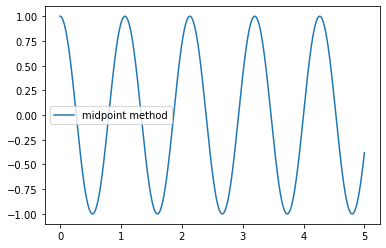

Trying 2000 steps
Trying 4000 steps


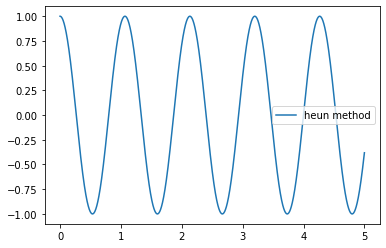

Trying 2000 steps


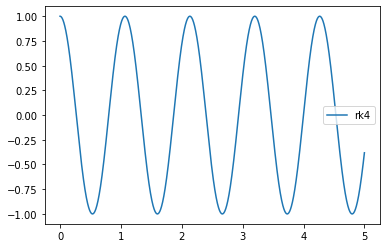

In [3]:
# midpoint method

not_converged_yet = True
num_steps = 1000

t_old, y_old = midpoint_method(num_steps,theta0)

while not_converged_yet:
  num_steps = 2*num_steps
  print('Trying %d steps' % num_steps)
  t_new, y_new = midpoint_method(num_steps,theta0)
  not_converged_yet = not(np.allclose(y_old,y_new[::2],atol=1e-2,rtol=1e-2))
  y_old = y_new

theta = y_new[:,0]
plt.plot(t_new,theta,label='midpoint method')
plt.legend()
plt.show()

# Heun method

not_converged_yet = True
num_steps = 1000

t_old, y_old = heun_method(num_steps,theta0)

while not_converged_yet:
  num_steps = 2*num_steps
  print('Trying %d steps' % num_steps)
  t_new, y_new = heun_method(num_steps,theta0)
  not_converged_yet = not(np.allclose(y_old,y_new[::2],atol=1e-2,rtol=1e-2))
  y_old = y_new

theta = y_new[:,0]
plt.plot(t_new,theta,label='heun method')
plt.legend()
plt.show()

# RK4 method

not_converged_yet = True
num_steps = 1000

t_old, y_old = rk4(num_steps,theta0)

while not_converged_yet:
  num_steps = 2*num_steps
  print('Trying %d steps' % num_steps)
  t_new, y_new = rk4(num_steps,theta0)
  not_converged_yet = not(np.allclose(y_old,y_new[::2],atol=1e-2,rtol=1e-2))
  y_old = y_new

theta = y_new[:,0]
plt.plot(t_new,theta,label='rk4')
plt.legend()
plt.show()

## <font color=#46769B>Part (c)</font>

Here we repeat Exercise 18 (c) with our new methods. The goal is to determine numerically $T(\theta_0)$, that is, how the oscillation period depends on the initial displacement $\theta$.

Write a function `find_period(theta_0)` that will determine the period $T$ for a given initial condition $\theta_0$, using any *one* of the methods in parts (a) and (b) to solve for $\theta(t)$. Given your numerical solution for $\theta(t)$:

- Determine $T$ as the distance between two maxima. (In the solutions to Exercise 18, I showed how to determine $T$ as twice the distance between a maximum and minimum. Here I challenge you to *not* copy what I did, but write your own version if you haven't completed this part already.)

Next, make a plot of $T$ as a function of $\theta_0$ for 31 values of $\theta_0$ in `numpy.linspace(0.1,3.1,31)`.

Compare to the analytic approximation

$$ T(\theta_0) = \frac{2\pi}{\omega} \left( 1 + \frac{1}{16} \theta_0^2 + \frac{11}{3072} \theta_0^4 + \mathcal{O}(\theta_0^6) \right)$$

where the leading $1$ is the small-angle result. Plot this formula on your plot to check that it agrees with your results for small and medium values of $\theta_0$.

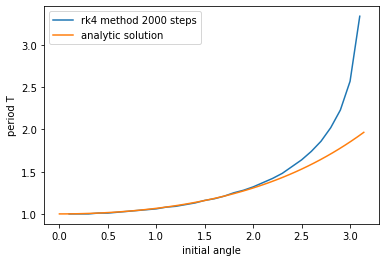

In [2]:
num_steps = 2000 #when rk4 converges
def find_period(theta_0):
  t, y = rk4(num_steps,theta_0)
  theta = y[:,0]
  a = []
  for i in range(len(theta)):
    if theta[i+1] >= 0:
      a.append(theta[i])
    elif theta[i+1] < 0:
      break

  b = len(a)

  # b gives us 1/4 of a period

  c = 4 * b
  T = t[c]
  return T 

theta_0_list = np.linspace(0.1,3.1,31)

T_list = []

for theta_0 in theta_0_list:
  T = find_period(theta_0)
  T_list.append(T)

plt.plot(theta_0_list,T_list,label='rk4 method 2000 steps')
plt.legend()


# analytic solution 
x = np.linspace(0,np.pi)
y = 1 + 1/16 * x**2 + 11/3072 * x**4

plt.plot(x,y,label='analytic solution')
plt.xlabel('initial angle')
plt.ylabel('period T')
plt.legend()
plt.show()